<p><h1 align='center'><b><font color='#7D0033'>Time Series Analysis Project</b></h1></p>

<p><h2><b><font color=darkblue>Group Members :</b></h1></p>
<ol><font color=black>
<li> Vaishnavi Tale (Mis no. 242262017)</li>
<li> Prerana Nimhan (Mis no. 242262012)</li>
<li> Aditi Kandarkar (Mis no. 242262007)</li>
</ol>

<p><h2><b><font color='darkblue'>Design and Analisys of Time Series Models</b></h2></p>

<ul><font color='darkblue'>
<li><b>ARMA : Auto Regressive Moving Average</b></li> 
<li><b>ARIMA : Auto Regressive Integrated Moving Average</b></li> 
<li><b>SARIMAX : Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors</b></li> 
</ul>

<b><font color='darkblue'>On the Carbon Emissions(January 1973 to 2014) Dataset.</b>

<p><h2><b><font color='darkblue'>Dataset Information</h2></b></p>

The dataset used is a public dataset of monthly carbon dioxide emissions from electricity generation available at the Energy Information Administration and Jason McNeill. The dataset includes CO2 emissions from each energy resource starting January 1973 to 2014.

*   Dataset Link: https://www.kaggle.com/datasets/txtrouble/carbon-emissions



<p><b><h2><font color=darkblue>Importing Libraries</h2></b></p>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the CSV file from Google Drive
file_path = '/content/drive/MyDrive/Datasets/MER_T12_06.csv'

In [ ]:
data=pd.read_csv(file_path)
data.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [ ]:
# Changing Month from int to Date
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce') #coerce to have a NaN field in empty or corrupted
data = pd.read_csv(file_path, parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
data.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [ ]:
#drop all rows with null index 

df = data[pd.Series(pd.to_datetime(data.index, errors='coerce')).notnull().values]
df.head(15)

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           4707 non-null   object
 1   Value         4707 non-null   object
 2   Column_Order  4707 non-null   int64 
 3   Description   4707 non-null   object
 4   Unit          4707 non-null   object
dtypes: int64(1), object(4)
memory usage: 220.6+ KB


In [ ]:
# As we can see from the df data type, the emission value is represented as an object. 
# Converting the emision value into numeric value as follows

df['Value'] = pd.to_numeric(df['Value'] , errors='coerce')
df.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [ ]:
df.isnull().sum()

MSN               0
Value           384
Column_Order      0
Description       0
Unit              0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

MSN             0
Value           0
Column_Order    0
Description     0
Unit            0
dtype: int64

<p><h2><b><font color='darkblue'>- Data Vizualisation</b></h2></p>

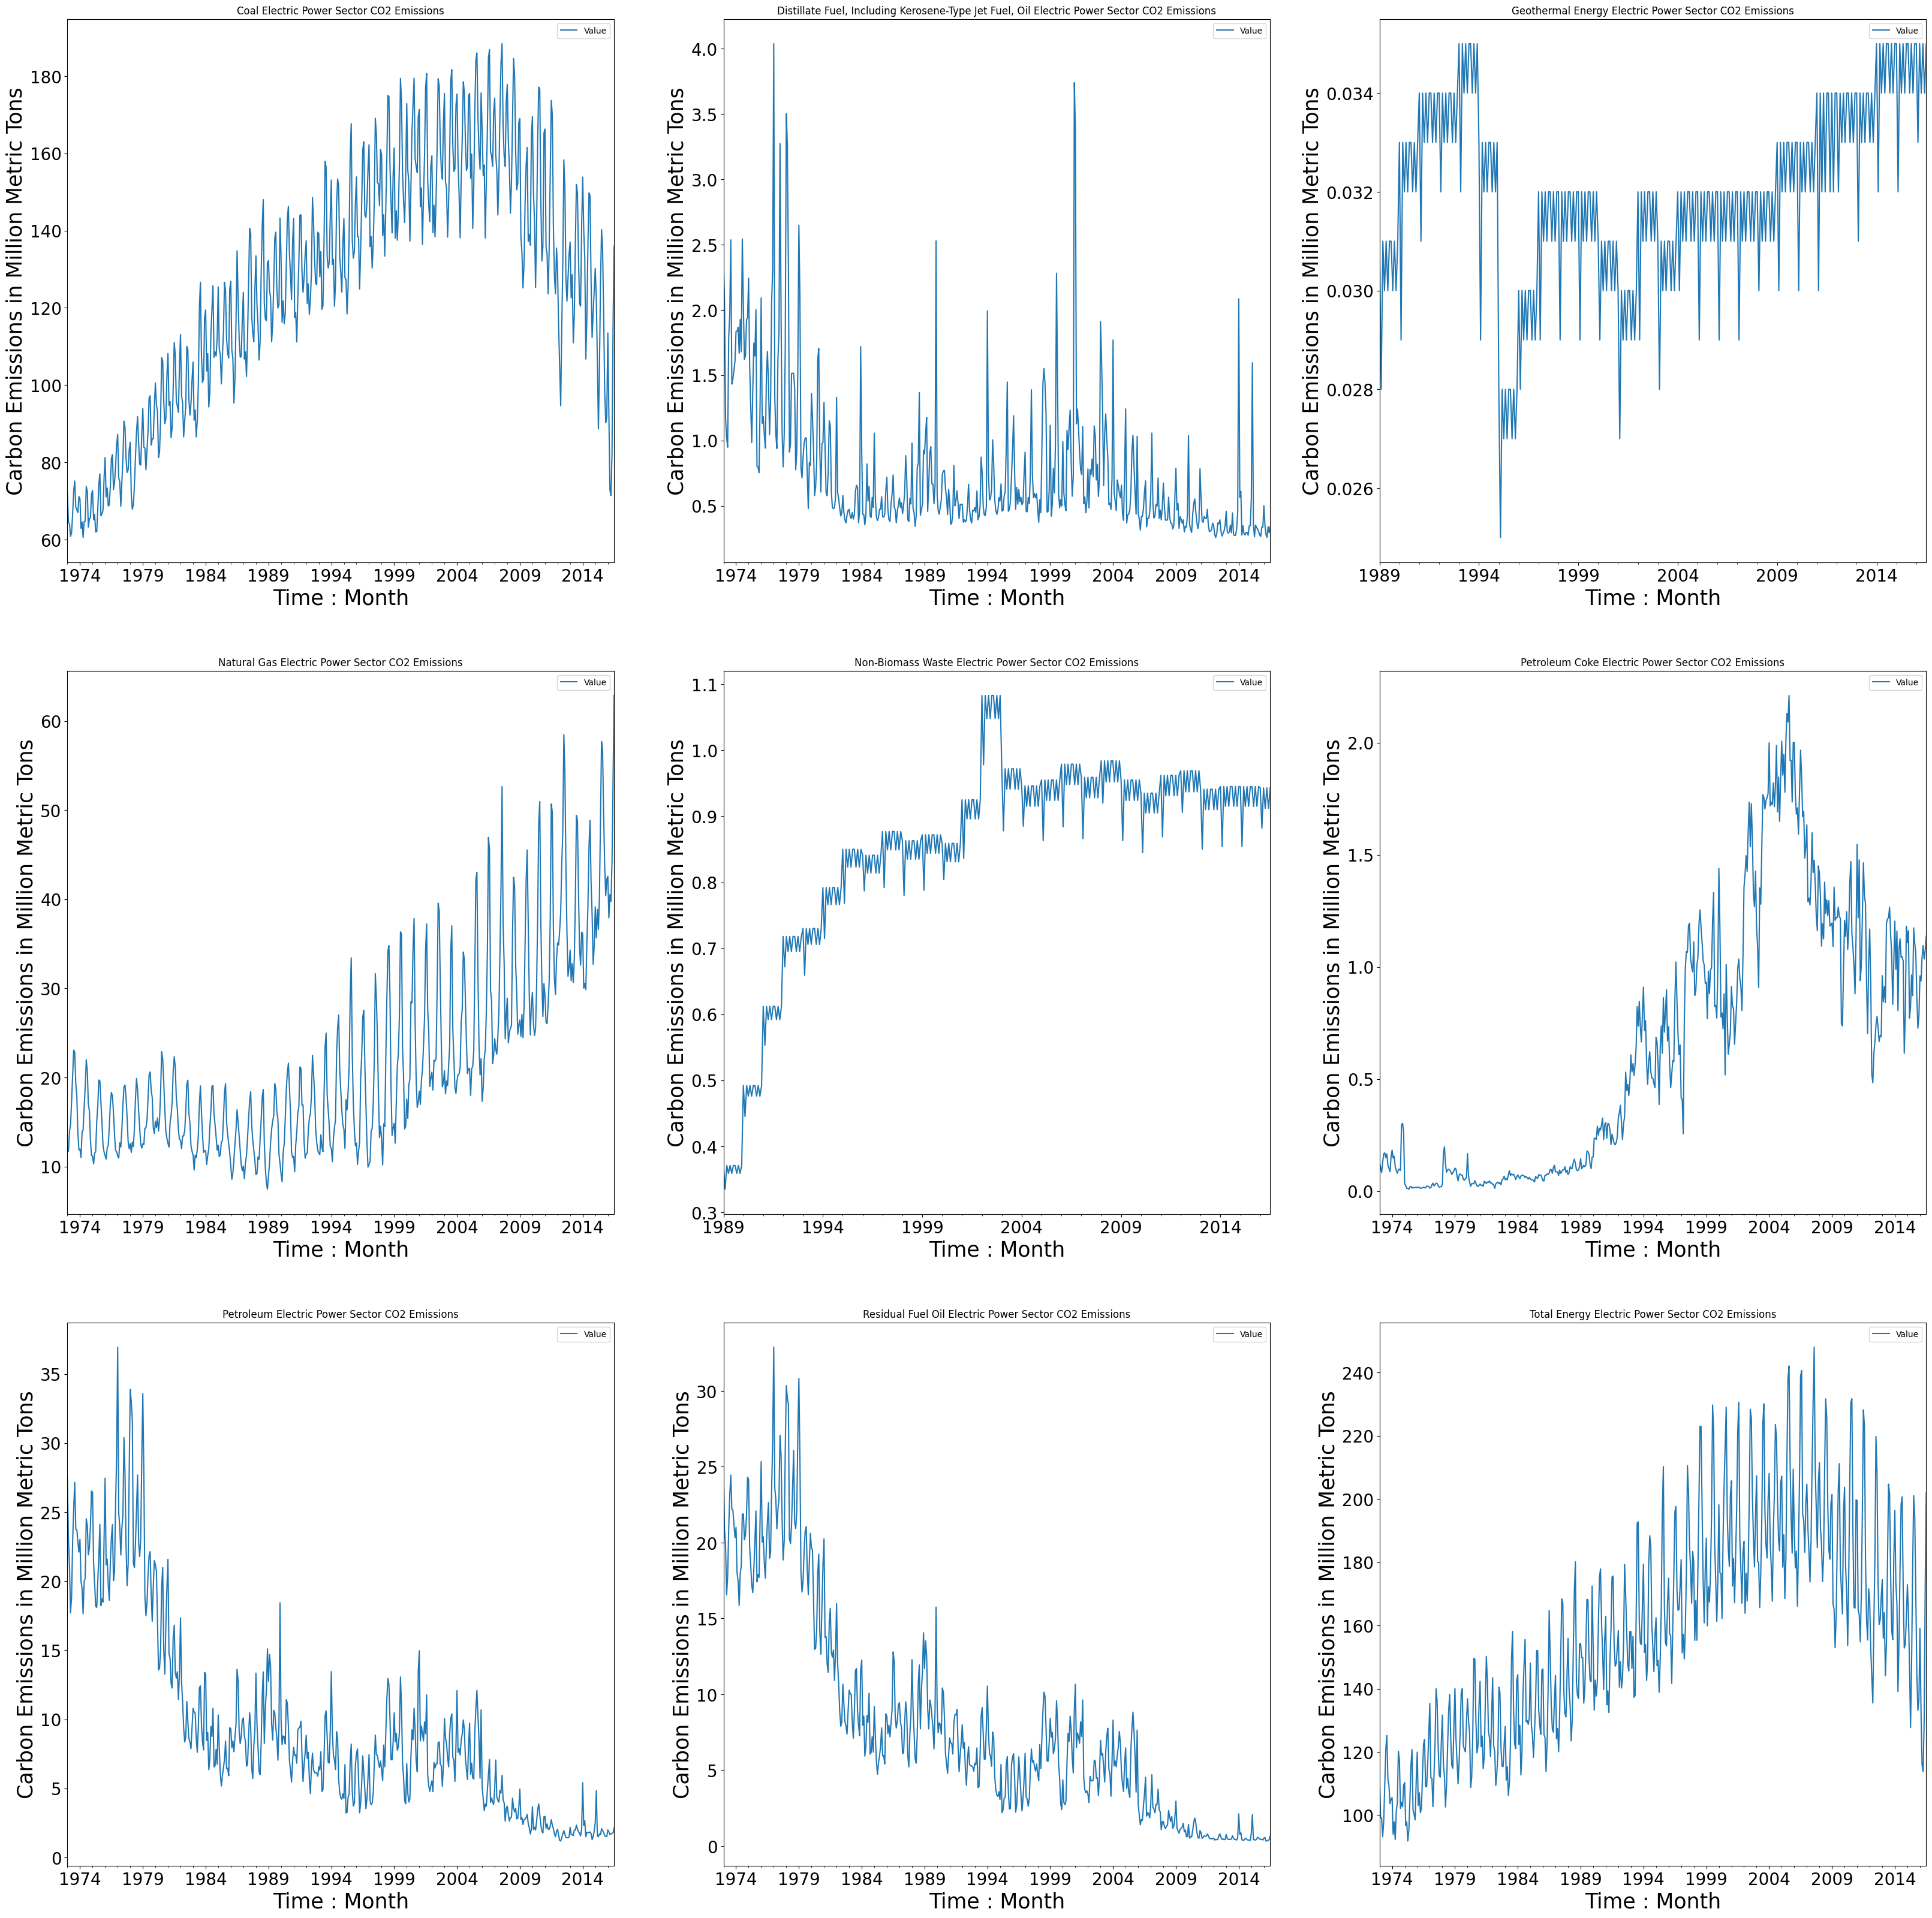

In [ ]:
#Plot per Emission source
fig, axes = plt.subplots(3,3, figsize = (40, 40))
for (desc, group), ax in zip(df.groupby('Description'), axes.flatten()):
    group.plot(y='Value',ax = ax, title=desc, fontsize = 20)
    ax.set_xlabel('Time : Month')
    ax.set_ylabel('Carbon Emissions in Million Metric Tons')
    ax.xaxis.label.set_size(25)
    ax.yaxis.label.set_size(25)
plt.show()

- In recent years, the natural gas consumption has been increasing. However, the use of coal for power generation has been declining. The plots of CO2 emissions from coal and natural gas show this trend, while declining the CO2 contribution from coal, there is an increment in the contribution of CO2 emission from natural gas.

In [ ]:
CO2_per_source = df.groupby('Description')['Value'].sum().sort_values()

In [ ]:
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']

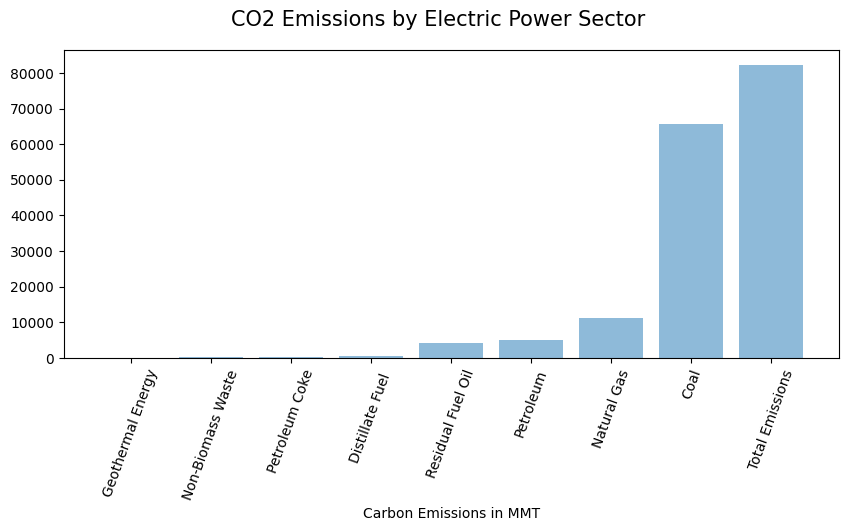

In [ ]:
fig = plt.figure(figsize = (10,4))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, CO2_per_source, align = 'center', alpha = 0.5)
fig.suptitle("CO2 Emissions by Electric Power Sector", fontsize= 15)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Carbon Emissions in MMT', fontsize = 10)
plt.show()

**From the bar chart, we can see that the contribution of coal to the total CO2 emission is significant followed by natural gas.**

**==============================================================================================================**

**We will make our forecasting for Coal Emission**

In [ ]:
# ems = emissions
ems = df.drop(['MSN','Column_Order','Unit'], axis=1)  # droping columns and leting only value and description column

# creating new dataframe 
pte = ems[ems['Description'] =="Coal Electric Power Sector CO2 Emissions"]
pte = pte.drop(['Description'], axis=1)
pte.head(13)

,Value
YYYYMM,
1973-01-01,72.076
1973-02-01,64.442
1973-03-01,64.084
1973-04-01,60.842
1973-05-01,61.798
1973-06-01,66.538
1973-07-01,72.626
1973-08-01,75.181
1973-09-01,68.397


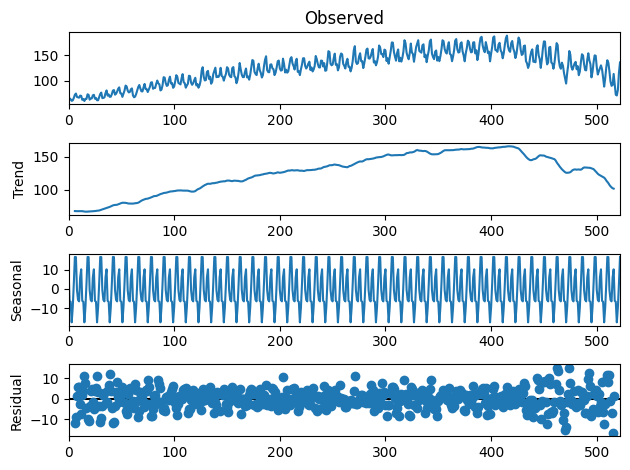

In [ ]:

result = seasonal_decompose(pte.values, model='additive',period=12)
result.plot()
plt.show()

In [ ]:
pte.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 523 entries, 1973-01-01 to 2016-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   523 non-null    float64
dtypes: float64(1)
memory usage: 8.2 KB


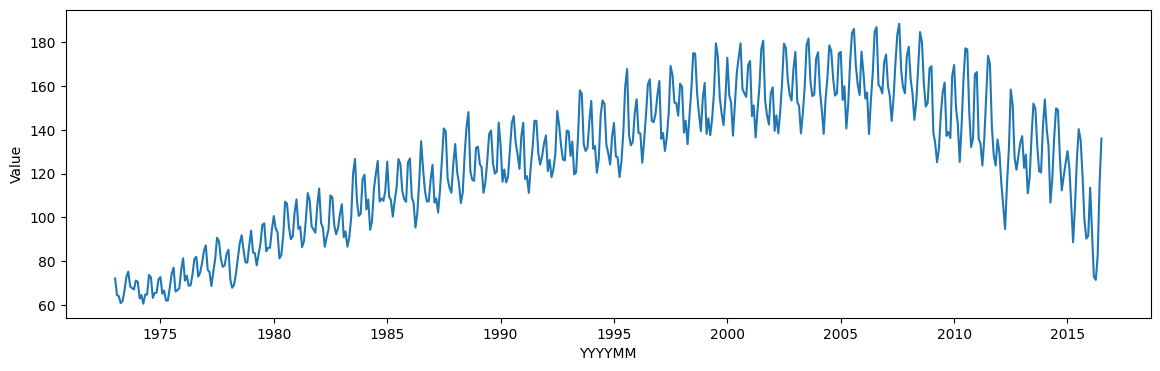

In [ ]:
plt.figure(figsize=(14,4))
sns.lineplot(x=pte.index,y=pte["Value"],data=pte)
plt.show()

**From the figures, there is a trend in the CO2 emission dataset with seasonal variation. So let's check for stationarity**

<p><h2><b><font color='darkblue'>DICKEY-FULLER test </b></h2></p>
   
*   **Testing stationarity** using Dickey-Fuller Augmentation

*   **Ho**- Fail to reject null hypothesis . it mean data is stationary.

*   **H1**- Reject the null hypothesis. it mean data is not stationary.

If p value is less than threshold value is 0.5 fail to reject the null hypothesis and it mean data is stationary.
If p value is more than threshold value 0.5. reject the null hypothesis accept alternative hypothesis.it mean data is not stationary.

In [ ]:

def stationary_test(data):
    x=data.dropna() 
    result=adfuller(x)
    print("ADF Stataics ",result[0])
    print("p-value",result[1])
    print("critical values",result[5])
    if result[1]<=0.05:
        print("fail to reject null hypothese h1 , it mean data is stationary")
    else:
        print("Reject the null hypotheise , it mean data is not stationary")


In [ ]:
stationary_test(pte['Value'])

ADF Stataics  -1.827630925557221
p-value 0.36683253565668955
critical values 3113.7276283046317
Reject the null hypotheise , it mean data is not stationary


In [ ]:
# Using 1st difference
pte['Value difference'] = pte['Value'] - pte['Value'].shift(1)

In [ ]:
pte

,Value,Value difference
YYYYMM,,
1973-01-01,72.076,NaN
1973-02-01,64.442,-7.634
1973-03-01,64.084,-0.358
1973-04-01,60.842,-3.242
1973-05-01,61.798,0.956
...,...,...
2016-03-01,72.840,-19.576
2016-04-01,71.410,-1.430
2016-05-01,82.510,11.100


<Axes: xlabel='YYYYMM'>

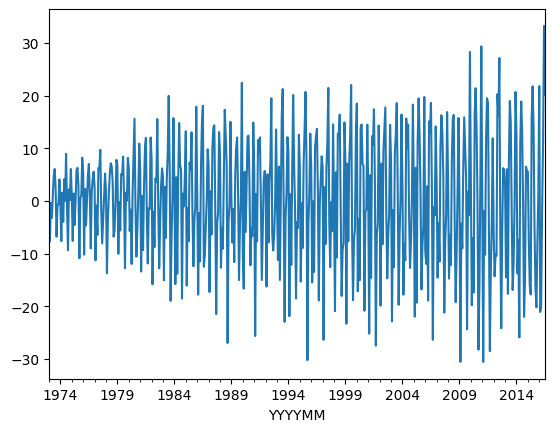

In [ ]:
pte['Value difference'].plot()

In [ ]:
stationary_test(pte['Value difference'])

ADF Stataics  -5.302530676309391
p-value 5.409945916192542e-06
critical values 3109.8452143545114
fail to reject null hypothese h1 , it mean data is stationary


*   **The Data is now Stationary Hence we can move ahead and use differencing order d=1 while model building**



**============================================================================================================**

*   **(ACF) Auto correlation function to find q value.**
*   **(PACF) Partially Auto correlation function to find p value.** 

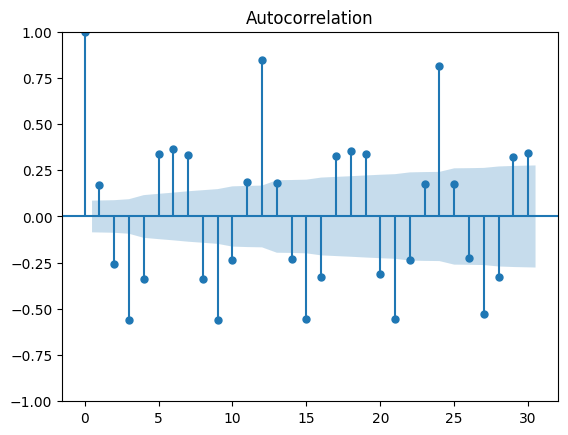

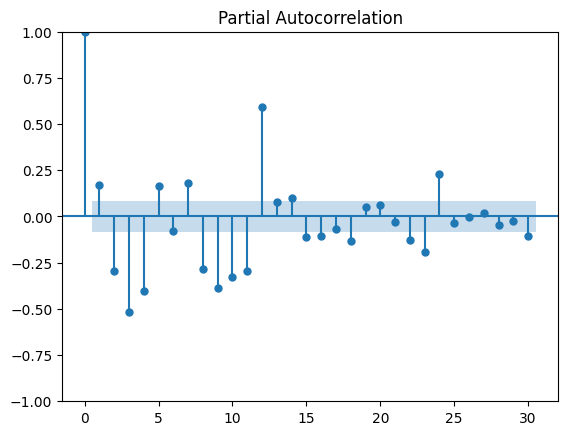

In [ ]:

plot_acf(pte['Value difference'].iloc[1:],lags=30)
plot_pacf(pte['Value difference'].iloc[1:],lags=30)
plt.show()

**==============================================================================================================**



<p><h2><b><font color='darkblue'>Data Plot with Moving Average & Standard Deviation</b></h2></p>

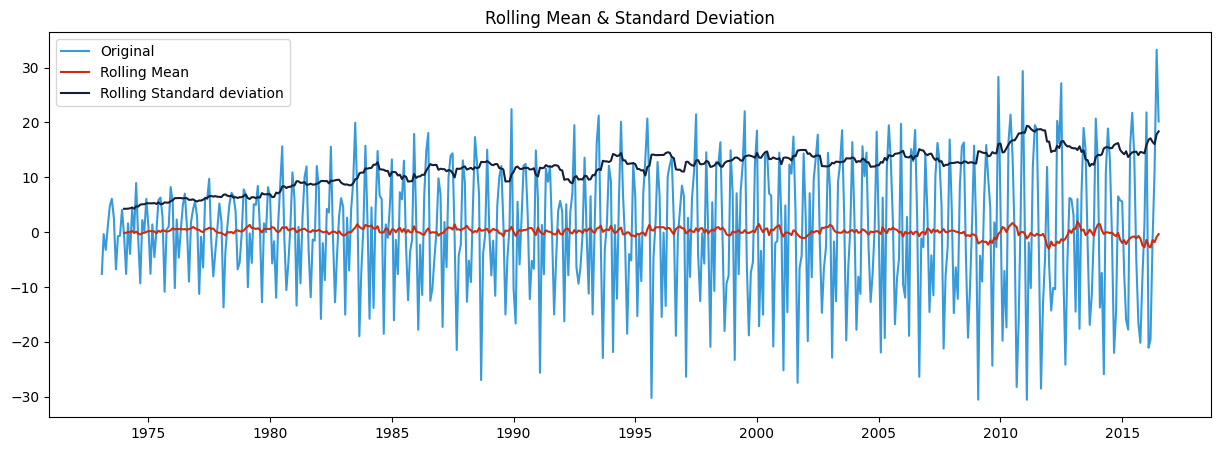

In [ ]:
pte["rolling_avg"] = pte["Value difference"].rolling(window=12).mean()
pte["rolling_std"] = pte["Value difference"].rolling(window=12).std()
plt.figure(figsize=(15,5))
plt.plot(pte["Value difference"], color='#379BDB', label='Original')
plt.plot(pte["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(pte["rolling_std"], color='#142039', label='Rolling Standard deviation')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:

rolling_avg_mse = mean_squared_error(pte['Value difference'].fillna(0), pte['rolling_avg'].fillna(0))
rolling_std_mse = mean_squared_error(pte['Value difference'].fillna(0), pte['rolling_std'].fillna(0))
print("Mean Squared Error of Rolling Average is: ",rolling_avg_mse)
print("Mean Squared Error of Rolling standard deviation is: ",rolling_std_mse)

Mean Squared Error of Rolling Average is:  135.52556011115092
Mean Squared Error of Rolling standard deviation is:  279.3642019428622


<p><h2><b><font color='darkblue'>ARMA Model Building</b></h2></p>

In [ ]:
# For a first ARMA model approach we are going to select p=2 and q=2

model = ARIMA(pte['Value'], order=(2,0,2))
model_fit = model.fit()

<Axes: xlabel='YYYYMM'>

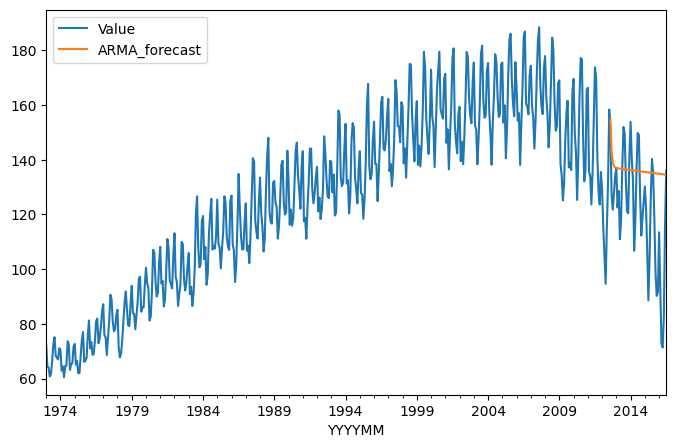

In [ ]:
pte['ARMA_forecast'] = model_fit.predict(start = 475, end = 523, dynamic= True)  
pte[['Value', 'ARMA_forecast']].plot(figsize=(8, 5))

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
original = pte.iloc[475:523,0]
arma_predicted = pte.iloc[475:523,4]

In [ ]:
rmse_arma = rmse(original, arma_predicted)
rmse_arma

24.464103138415137

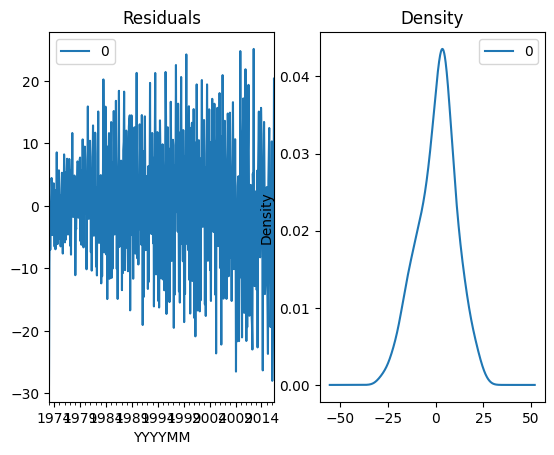

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

**==============================================================================================================** 

<p><h2><b><font color='darkblue'>ARIMA Model Building</b></h2></p>

<Axes: xlabel='YYYYMM'>

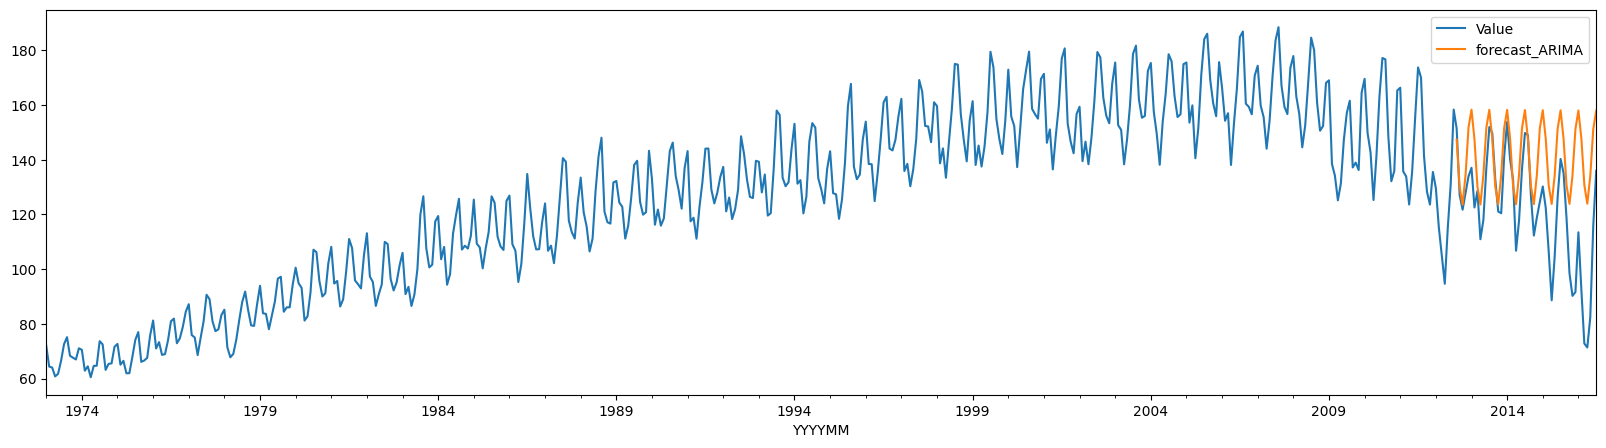

In [ ]:
# Lets first check arima model result
# d=1(because we did only one difference to convert non stationary to stationary so we are considering it 1

model1 = ARIMA(pte['Value'], order=(2, 1, 2))
model_fit1 = model1.fit()
pte['forecast_ARIMA'] = model_fit1.predict(start = 475, end = 523, dynamic = True)  
pte[['Value', 'forecast_ARIMA']].plot(figsize=(20, 5))

In [ ]:
model_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                  523
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1807.890
Date:                Wed, 24 May 2023   AIC                           3625.779
Time:                        13:48:27   BIC                           3647.067
Sample:                    01-01-1973   HQIC                          3634.117
                         - 07-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0008      0.003    395.767      0.000       0.996       1.006
ar.L2         -0.9988      0.002   -468.956      0.000      -1.003      -0.995
ma.L1         -1.0414      0.013    -78.277      0.000      -1.067      -1.015
ma.L2          0.9768      0.013     73.201      0.000       0.951       1.003
sigma2        58.8416      3.479     16.913      0.000      52.023      65.661
===================================================================================
Ljung-Box (L1) (Q):                  31.71   Jarque-Bera (JB):                 2.82
Prob(Q):                              0.00   Prob(JB):                         0.24
Heteroskedasticity (H):               2.52   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
arima_predicted = pte.iloc[475:523,5]
rmse_arima = rmse(original, arima_predicted)
rmse_arima

25.629770735331313

**==============================================================================================================**

<p><h2><b><font color='darkblue'>SARIMAX Model Building</b></h2></p>

*   SARIMA on same orders(2,1,2) like ARIMA.
*   Seasonal_order(2,1,2,12) because it’s analog version of ARIMA’S (p,d,q).but here (p,d,q) represent seasonal order.
*   12 is seasonal factor. which is the no of periods in a year seasonality repeated.

<Axes: xlabel='YYYYMM'>

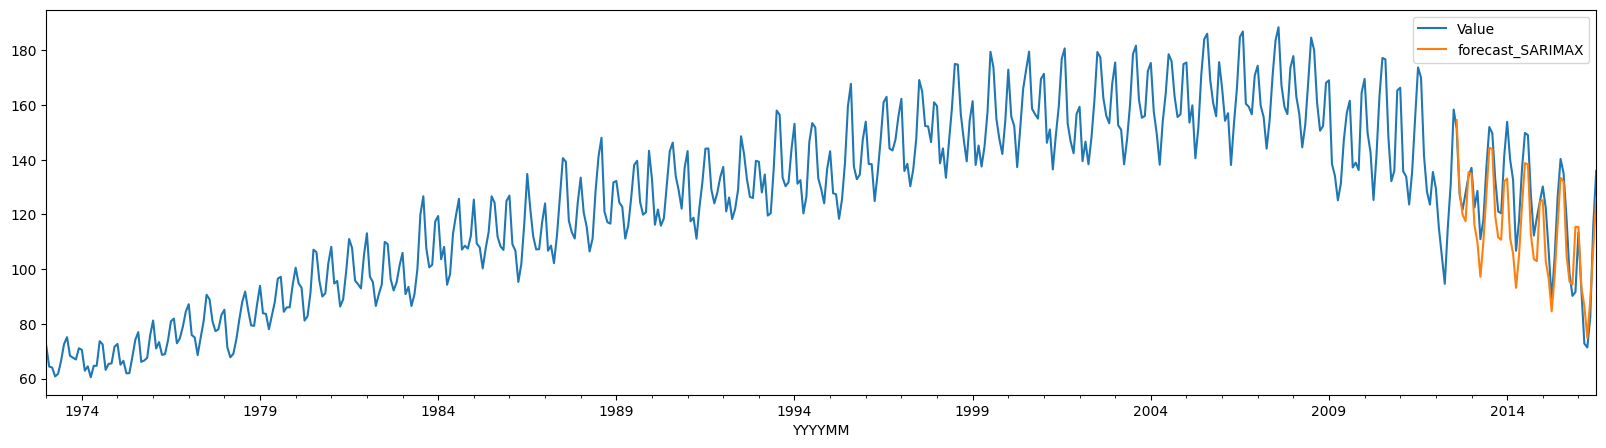

In [ ]:
import statsmodels.api as sm

model2 = sm.tsa.statespace.SARIMAX(pte['Value'],order=(2,1,2),seasonal_order=(2,1,2,12))
result = model2.fit()
pte['forecast_SARIMAX'] = result.predict(start = 475, end = 523, dynamic = True)  
pte[['Value','forecast_SARIMAX']].plot(figsize=(20, 5))

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Value   No. Observations:                  523
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1499.546
Date:                            Wed, 24 May 2023   AIC                           3017.092
Time:                                    13:48:41   BIC                           3055.202
Sample:                                01-01-1973   HQIC                          3032.033
                                     - 07-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0516      0.880      0.059      0.953      -1.674       1.777
ar.L2          0.1772      0.460      0.386      0.700      -0.724       1.078
ma.L1         -0.3647      0.875     -0.417      0.677      -2.080       1.350
ma.L2         -0.3589      0.727     -0.494      0.622      -1.784       1.066
ar.S.L12       0.5980      0.156      3.843      0.000       0.293       0.903
ar.S.L24      -0.2510      0.047     -5.337      0.000      -0.343      -0.159
ma.S.L12      -1.3539      0.149     -9.084      0.000      -1.646      -1.062
ma.S.L24       0.5610      0.118      4.768      0.000       0.330       0.792
sigma2        20.4297      1.059     19.287      0.000      18.354      22.506
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                34.05
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               3.04   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
sarimax_predicted = pte.iloc[475:523,6]
rmse_sarimax = rmse(original, sarimax_predicted)
rmse_sarimax

11.719614689967553

In [ ]:
#Root Mean Squred Error values of different models
result = pd.DataFrame()
result['ARMA'] = [rmse_arma]
result['ARIMA'] = [rmse_arima]
result['SARIMAX'] = [rmse_sarimax]
result


,ARMA,ARIMA,SARIMAX
0,24.464103,25.629771,11.719615


<p><h2><b><font color='darkblue'>Printing forecasting values of the time series</b></h2></p>

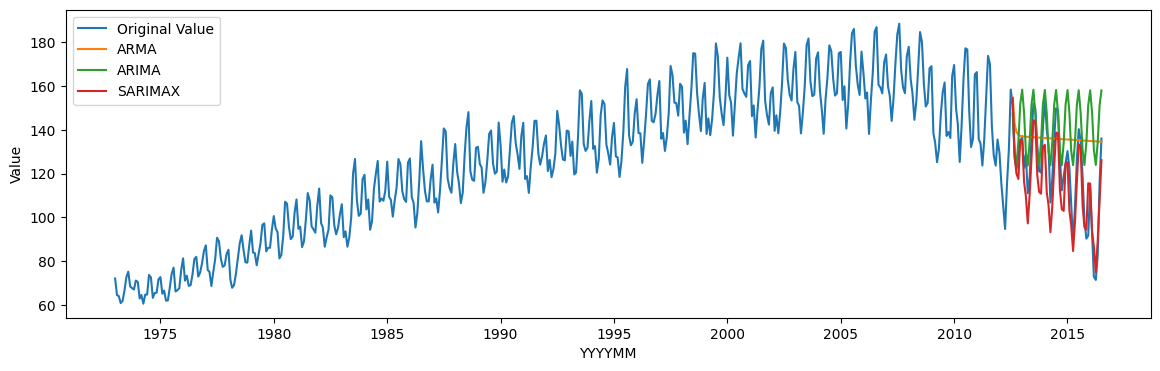

In [ ]:
fig, ax = plt.subplots(figsize=(14,4))
ax= sns.lineplot(x = pte.index, y='Value', data=pte, label='Original Value')
ax2 = sns.lineplot(x = pte.index, y='ARMA_forecast', data=pte, label='ARMA')
ax3 = sns.lineplot(x = pte.index, y = 'forecast_ARIMA', data=pte, label='ARIMA')
ax4 = sns.lineplot(x = pte.index, y='forecast_SARIMAX', data=pte, label='SARIMAX')

<p><h2><b><font color='darkblue'>Conclusion :</h2></b></p>

In this notebook, we have explored 
* how to retrieve CSV dataset 
* how to transform the dataset into times series, 
* Testing Staionarity of the Dataset 
* If not then making the dataset stationary using graphical and Dickey-Fuller test statistic methods

In this notebook we build different models of time series analysis:
* ARMA - Auto Regressive Moving Average
* ARIMA - Auto Regressive Integrated Moving Average
* SARIMAX - Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors 
  
We found that SARIMAX model perform the best on our Carbon Emissions Dataset.